# Interfacing R from a Python 3 Jupyter Notebook
Jared Stufft, 12-19-2017

Python and R are two giants in the analytics world for data cleaning, pipelines, machine learning/statistical modeling, and data visualization. As data scientists, analysts, or statisticians, we often choose the tool that allows us to perform the task at hand in the quickest and most accurate way possible. For some, that means Python. For others, that means R. For many, myself included, that means a combination of the two.

The problem then arises that it takes valuable development and analysis time to switch between these two languages, passing your data and models through .csv files or through a database system. Fortunately, there's a solution that allows data professionals to quickly and easily interface R and Python together in one single Jupyter notebook.

This notebook provides a simple introduction to calling R code from a Python 3 kernel Jupyter notebook using the rpy2 library and magic commands.

## Libraries Needed
If you're using the Anaconda distribution of Python, all you need to do is type '**conda install rpy2**' into the Anaconda terminal. You may also need to download Anaconda's R distribution, which can easily be found within the Anaconda Navigator.

Within your notebook, you'll import the **rpy2.rinterface** library:

In [1]:
import rpy2.rinterface

# A few other standard libraries for this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Magic Commands
A really useful feature of IPython and Jupyter notebooks are magic commands. These commands, prefaced with a '%', add some extra power over top of the typical Python syntax to solve common problems that may arise. A more comprehensive guide to magic commands can be found in the IPython docs here: http://ipython.readthedocs.io/en/stable/interactive/magics.html

The two magic commands we'll be most focused on for this notebook is **%load_ext** and **%%R**.

The **%load_ext** magic command loads the rpy2 IPython extension into the notebook, essentially initializing the R interface and allowing the notebook to connect and pass objects between the two languages. This magic command needs only to be run once:

In [2]:
%load_ext rpy2.ipython

Now that the extension is loaded, putting the **%%R** magic command at the very top of a code cell will allow us to write our R code:

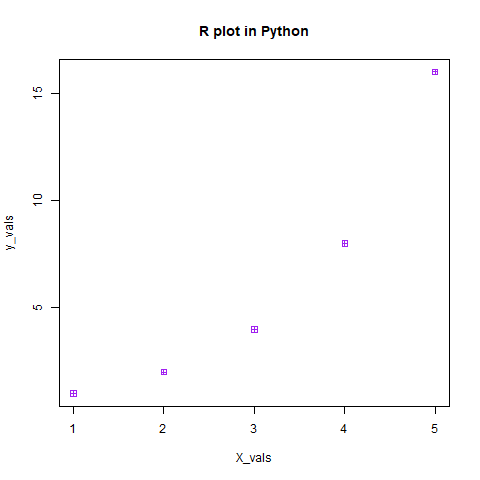

In [3]:
%%R
# ^ Tells the notebook that this code cell is actually R

# Now we can write R code as if this were an R notebook
X_vals <- c(1, 2, 3, 4, 5)
y_vals <- c(1, 2, 4, 8, 16)

plot(X_vals, y_vals,
     col='purple', pch=12,
     main='R plot in Python')

## Passing Objects Between Python and R

Of course, the largest benefit is that we can create or manipulate objects/data in one language, pass it to the other, and then run more operations. As Python is still pretty young in the analytics world, I tend to use R for more niche statistical methods such as survival analysis. On the other hand, I prefer Python for data manipulation and machine learning. The rpy2 interface allows you to use a language for one action, pass the object to the other language, and complete your calculations.

There's a couple dedicated magic commands to do this such as **%Rget** and **%Rpush**, but I prefer the **-i** and **-o** options in the **%%R** magic command. A variable listed after **-i** on the **%%R** line will be inputted and converted to an R object from Python. Likewise, a variable listed after **-o** on the **%%R** line will be outputted and converted from an R object to a Python object.

**NOTE:** I use Windows OS. I experience issues printing R objects with an **%%R** designated code block - it appears in the IPython console opened up by Jupyter but not within the notebook itself. I've been told that this is not an issue with Mac OS, as the rpy2 interface works a touch better there. To get around this, I just output R variables I'd like to print to a Python object and print there.

In [4]:
# Python to R

# Create a pandas dataframe in Python
python_df = pd.DataFrame({'A': [2, 3, 5, 7, 8, 10, 6, 7, 1, 4, 2, 3, 5, 8],
                          'B': [1, 3, 4, 5, 5, 7, 4, 6, 2, 3, 1, 5, 6, 7]})

print(python_df)

     A  B
0    2  1
1    3  3
2    5  4
3    7  5
4    8  5
5   10  7
6    6  4
7    7  6
8    1  2
9    4  3
10   2  1
11   3  5
12   5  6
13   8  7


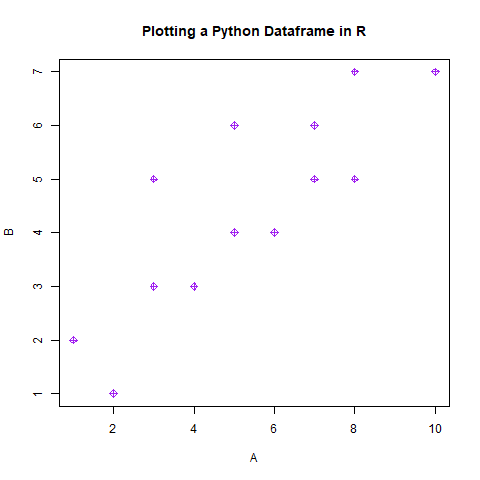

In [5]:
%%R -i python_df
# ^ Pass the dataframe to R using the -i option for %%R

# Using R's plot function
plot(python_df,
     main='Plotting a Python Dataframe in R',
     col='purple',
     pch=9)

In [6]:
%%R -o model -o coef
# R to Python
# the python_df variable is still in the R
# We can output the model object we create using the -o options

# Creating a linear model on the Python DF using R's lm() function
model <- lm(B ~ A, data=python_df)
coef <- model$coefficients

In [7]:
# Show the model output as in R
print(model)
print(type(model))

# Model coefficients
print(coef)
print(type(coef))

# The rpy2 objects can be turned into more native Python data structures
print(list(coef))



Call:

lm(formula = B ~ A, data = python_df)



Coefficients:

(Intercept)            A  

     1.0203       0.6298  



<class 'rpy2.robjects.vectors.ListVector'>
(Intercept)           A 

  1.0203160   0.6297968 

<class 'rpy2.robjects.vectors.FloatVector'>
[1.0203160270880376, 0.6297968397291196]


In [8]:
%%R -o cars_df
# Another R to Python example

# R has a built-in library of sample datasets
library(datasets)

cars_df <- cars

# Using the -o function from above, we can output the cars_df dataframe to Python

**NOTE:** An R convention is to use a dot as a delineation for object names, where in Python it's customary to use an underscore. E.g. In R, we might call the cars dataframe 'cars.df', where in Python we would call it 'cars_df'. However, Python uses the dot as an accessor to object attributes, similar to how R uses the $ accessor. When outputting an R object to Python, avoid using the dot as a delineator as you will get errors when trying to work with those objects in Python.

   speed  dist
1    4.0   2.0
2    4.0  10.0
3    7.0   4.0
4    7.0  22.0
5    8.0  16.0


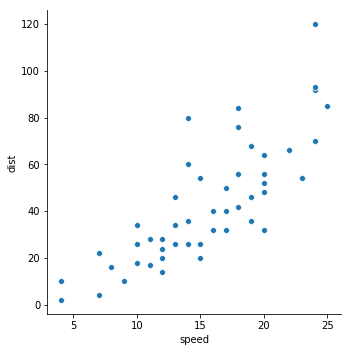

In [10]:
# The cars dataframe is now in Python
print(cars_df.head())

sns.pairplot(x_vars=['speed'],
             y_vars=['dist'],
             data=cars_df,
             height=5)
plt.show()

## %Rpush and %Rget

As I mentioned, I prefer using the -i and -o options in the **%%R** magic command to pass objects between Python and R. However, **%Rpush** and **%Rget** are available as alternatives:

In [11]:
%%R

# create a sample R object: my_var
my_var <- c(1, 2, 3, 4, 5)

In [12]:
# Request the my_var object from a Python block using %Rget
my_python_var = %Rget my_var

print(my_python_var)
print(type(my_python_var))

print(list(my_python_var))

[1] 1 2 3 4 5

<class 'rpy2.robjects.vectors.FloatVector'>
[1.0, 2.0, 3.0, 4.0, 5.0]


In [13]:
# Create a sample Python object: my_python_var_1 and my_python_var_2
my_python_var_1 = np.array([1, 2, 3, 4, 5])
my_python_var_2 = np.array([1, 2, 4, 8, 16])

# Push the Python objects to R
%Rpush my_python_var_1 my_python_var_2

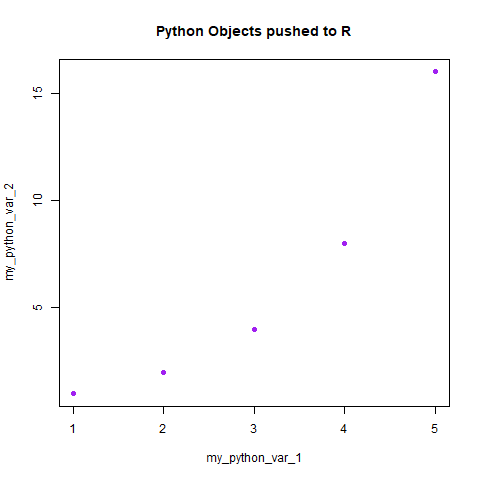

In [14]:
%%R
plot(my_python_var_1, my_python_var_2,
     main='Python Objects pushed to R',
     col='purple',
     pch=16)

## Other Resources

That wraps up this quick tutorial. I hope you found it informative. Here's some other resources on this method, including interfacing other languages:
* http://rpy.sourceforge.net/rpy2/doc-2.4/html/index.html
* http://carreau.github.io/posts/23-Cross-Language-Integration.html
* http://blog.revolutionanalytics.com/2016/01/pipelining-r-python.html

You may also be interested in Beaker Notebooks, though I have no experience with them. They look pretty cool and I'm going to check them out!
* http://beakernotebook.com/